## <span style="color:red">@Project by Hamid DUMIOT</span>

## Project Title: Digital Card Sales Optimization


Objective:
To enhance the acquisition of new credit card customers through a data-driven approach by analyzing customer behavior and optimizing the digital sales strategy.


## 1- Import Libraries 📚

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("BankChurners.csv")

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 2- Data Exploration🔎

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [89]:
# Dropping columns with unusual names
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [90]:
df.shape

(10127, 21)

Feature Exploration

CLIENTNUM : Unique client identifier.

Attrition_Flag : Indicates whether the customer's account is active or has churned.

Customer_Age : Age of the customer.

Gender : Gender of the customer.

Dependent_count : Number of dependents of the customer.

Education_Level : Educational level of the customer.

Marital_Status : Marital status of the customer.

Income_Category : Income category of the customer.

Card_Category : Category of the credit card held by the customer.

Months_on_book : Number of months the customer has been a bank client.

Total_Relationship_Count : Total number of bank products held by the customer.

Months_Inactive_12_mon : Number of months with inactivity in the last 12 months.

Contacts_Count_12_mon : Number of contacts with the bank in the last 12 months.

Credit_Limit : Credit limit on the credit card.

Total_Revolving_Bal : Total revolving balance on the credit card.

Avg_Open_To_Buy : Average open to buy credit line on the credit card.

Total_Amt_Chng_Q4_Q1 : Change in transaction amount over the last four quarters.

Total_Trans_Amt : Total transaction amount in the last 12 months.

Total_Trans_Ct : Total transaction count in the last 12 months.

Total_Ct_Chng_Q4_Q1 : Change in transaction count over the last four quarters.

Avg_Utilization_Ratio : Average utilization ratio of the credit card.

In [91]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [92]:
# Descriptive analysis for categorical data
df.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [93]:
nb_client = len(df)

print(f"There are {nb_client} customers")

There are 10127 customers


In [94]:
# checking for duplicated values
df.duplicated().sum()

0

In [95]:
# checking count the number of unique values in each column of the data
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

## 3 - Exploratory Data Analysis (EDA):

In [96]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Average Transaction Value (Total_Trans_Amt):

The average value of transactions made by customers. This can help understand the level of financial activity of customers.

In [97]:
avg_total_trans_amt =round(df['Total_Trans_Amt'].mean(),1)

print(f' The Average Transaction Value is egal to : {avg_total_trans_amt}')

 The Average Transaction Value is egal to : 4404.1


## Average Number of Transactions (Total_Trans_Ct):

The average of the total number of transactions made by customers.

In [98]:
avg_total_trans_ct = round(df['Total_Trans_Ct'].mean(),1)

print(f' The Average number of transactions is egal to : {avg_total_trans_ct}')

 The Average number of transactions is egal to : 64.9


## Avg_Utilization_Ratio:

The average utilization ratio of the credit card, representing the proportion of the credit limit used by the customer on average.

In [99]:
avg_utilization_ratio = round(df['Avg_Utilization_Ratio'].mean(),1)

print(f' The Average Utilization_Ratio is : {avg_utilization_ratio}')

 The Average Utilization_Ratio is : 0.3


# Churn Rate (Attrition):

In [100]:
client_att = df.groupby(by=['Attrition_Flag'])['CLIENTNUM'].count().reset_index()
client_att

,Attrition_Flag,CLIENTNUM
0,Attrited Customer,1627
1,Existing Customer,8500


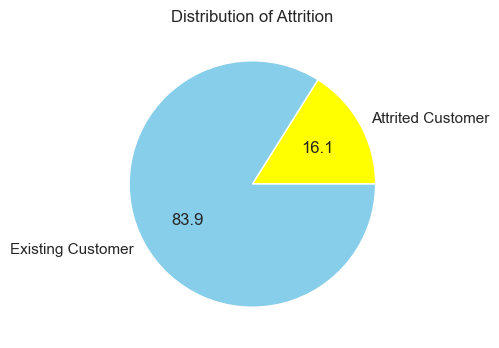

In [101]:
plt.figure(figsize = [5, 4])
plt.pie(client_att['CLIENTNUM'],labels = client_att['Attrition_Flag'],autopct='%.1f',colors =['yellow','skyblue'])
plt.title('Distribution of Attrition')
plt.show()

 
Churn Rate: = Attrited Customer / total customer.

In [102]:
nb_att_client = client_att[ (client_att['Attrition_Flag'] == "Attrited Customer")]['CLIENTNUM']


taux_churn = round((nb_att_client/client_att['CLIENTNUM'].sum())*100,1)
taux_churn_value = taux_churn.values[0]

print(f'Churn rate = {taux_churn_value}%')

Churn rate = 16.1%


## Customer Age Histogram (Customer_Age):

Visualize the age distribution of customers to understand the demographics.

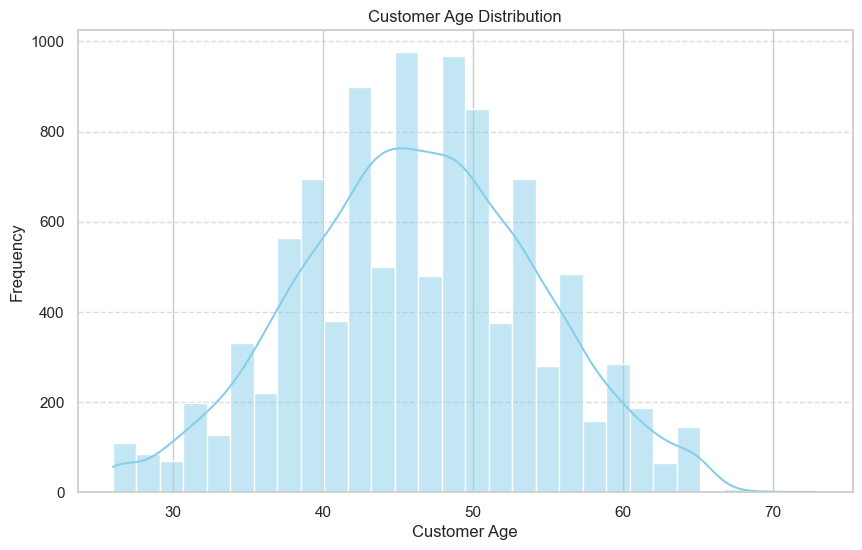

In [103]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Customer_Age'], bins=30, kde=True, color='skyblue')


plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

## Card Categories (Card_Category):

Understand the distribution of card types among customers

In [104]:
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\2016083577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Card_Category', data=df, palette='viridis', order=df['Card_Category'].value_counts().index)


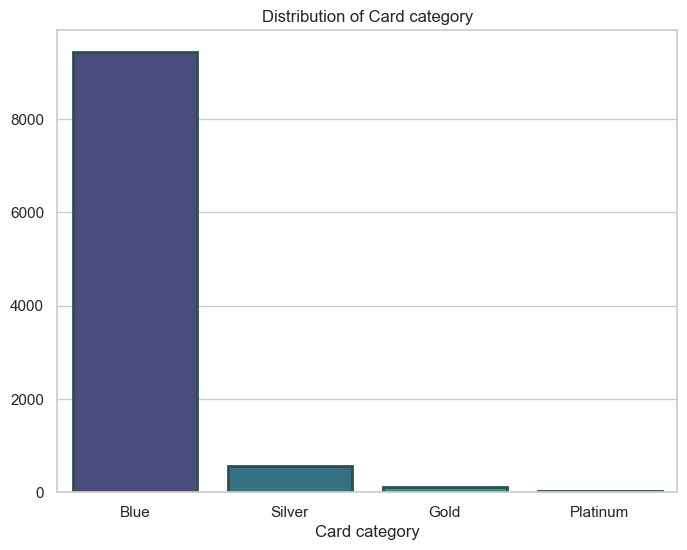

In [105]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Card_Category', data=df, palette='viridis', order=df['Card_Category'].value_counts().index)

# Personnalisez les barres avec une bordure plus épaisse et une couleur différente
for bar in ax.patches:
    bar.set_edgecolor('DarkSlateGrey')
    bar.set_linewidth(2)

plt.title('Distribution of Card category')
plt.xlabel('Card category')
plt.ylabel('')



plt.show()



## Credit Limit by Age (Credit_Limit vs. Customer_Age):

Explore how the credit limit varies based on customer age.

In [106]:
print(df['Credit_Limit'].dtype)
print(df['Customer_Age'].dtype)


float64
int64


<Figure size 200x800 with 0 Axes>

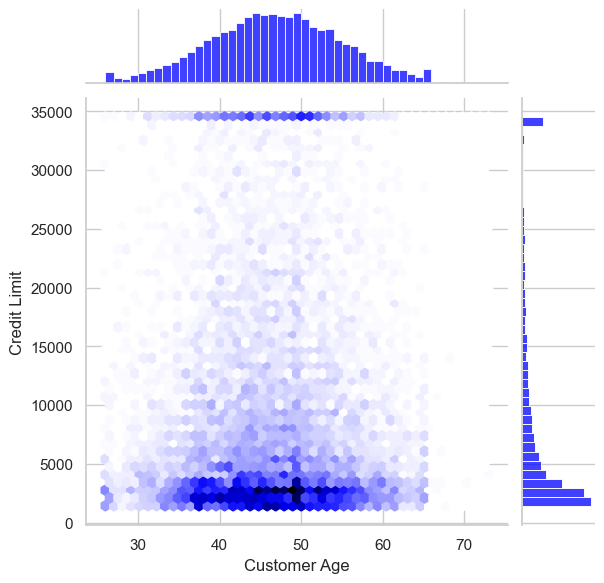

In [107]:
plt.figure(figsize=(2,8))

sns.set_theme(style="whitegrid")


g = sns.jointplot(data=df, x='Customer_Age', y='Credit_Limit', kind="hex", color='blue')

plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')

plt.show()


## Gender

In [108]:
client_gender = df.groupby(by=['Gender'])['CLIENTNUM'].count().reset_index()
client_gender

,Gender,CLIENTNUM
0,F,5358
1,M,4769


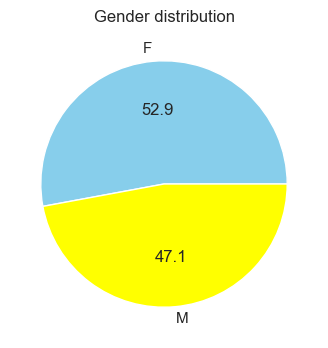

In [109]:
plt.figure(figsize = [5, 4])
plt.pie(client_gender['CLIENTNUM'],labels = client_gender['Gender'],autopct='%.1f',colors =['skyblue','yellow'])
plt.title('Gender distribution')
plt.show()


## Education (Education_Level):

View customer educational distribution.

C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\1689698831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Education_Level',palette='viridis')


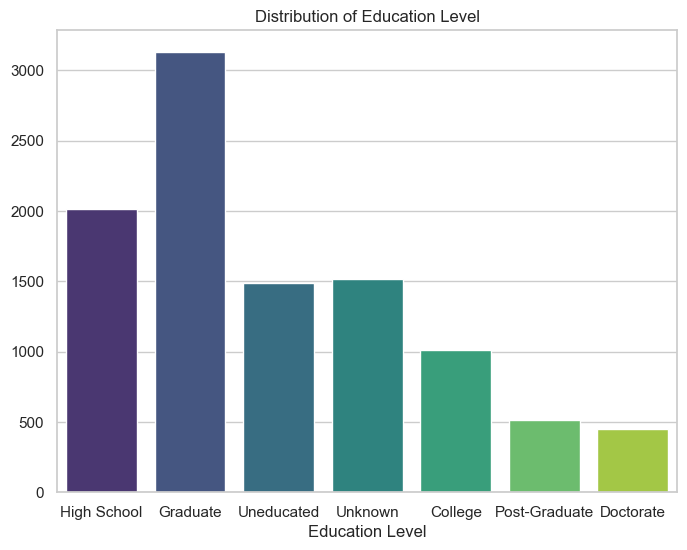

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Education_Level',palette='viridis')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('')
plt.show()

## Marital Status (Marital_Status):

Understand the distribution of clients' marital status.

C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\2385053762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df, palette='viridis')


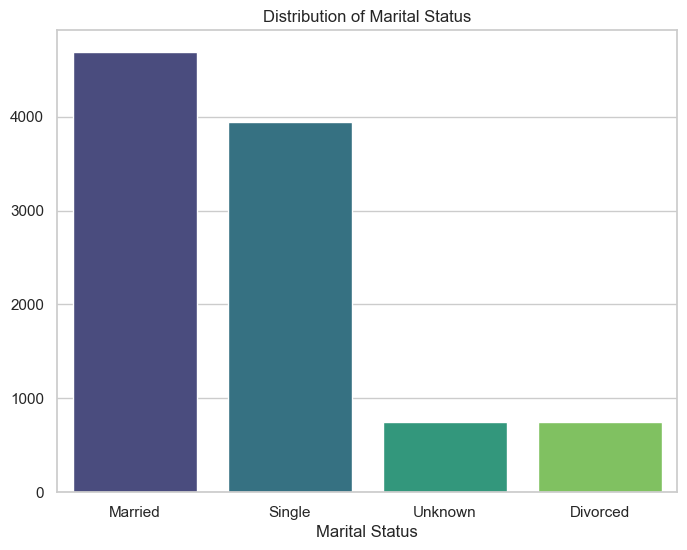

In [111]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=df, palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('')
plt.show()

## Income Category Distribution

Understand the distribution of clients' income.

C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\2616833031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Income_Category', data=df, palette='viridis')


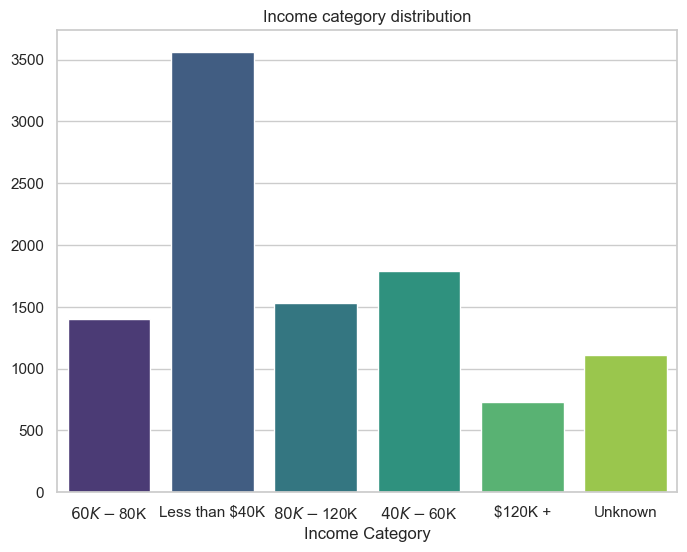

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Category', data=df, palette='viridis')
plt.title('Income category distribution')
plt.xlabel('Income Category')
plt.ylabel('')
plt.show()

## Transactions by Card Category (Total_Trans_Amt vs. Card_Category):

Identify variations in transactions based on card category.

C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\3063563803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df, palette='viridis')


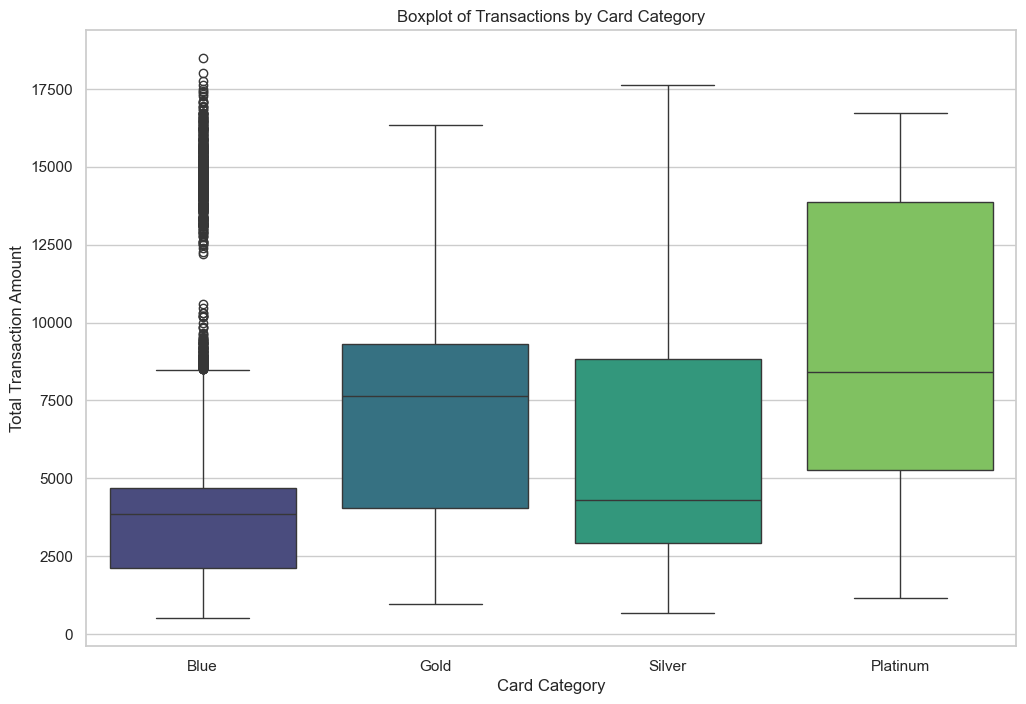

In [113]:
# Assuming your DataFrame is named df
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df, palette='viridis')

# Customize the plot
plt.title('Boxplot of Transactions by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Total Transaction Amount')

# Show the plot
plt.show()

## Numerical Analysis

In [114]:
numerical_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]



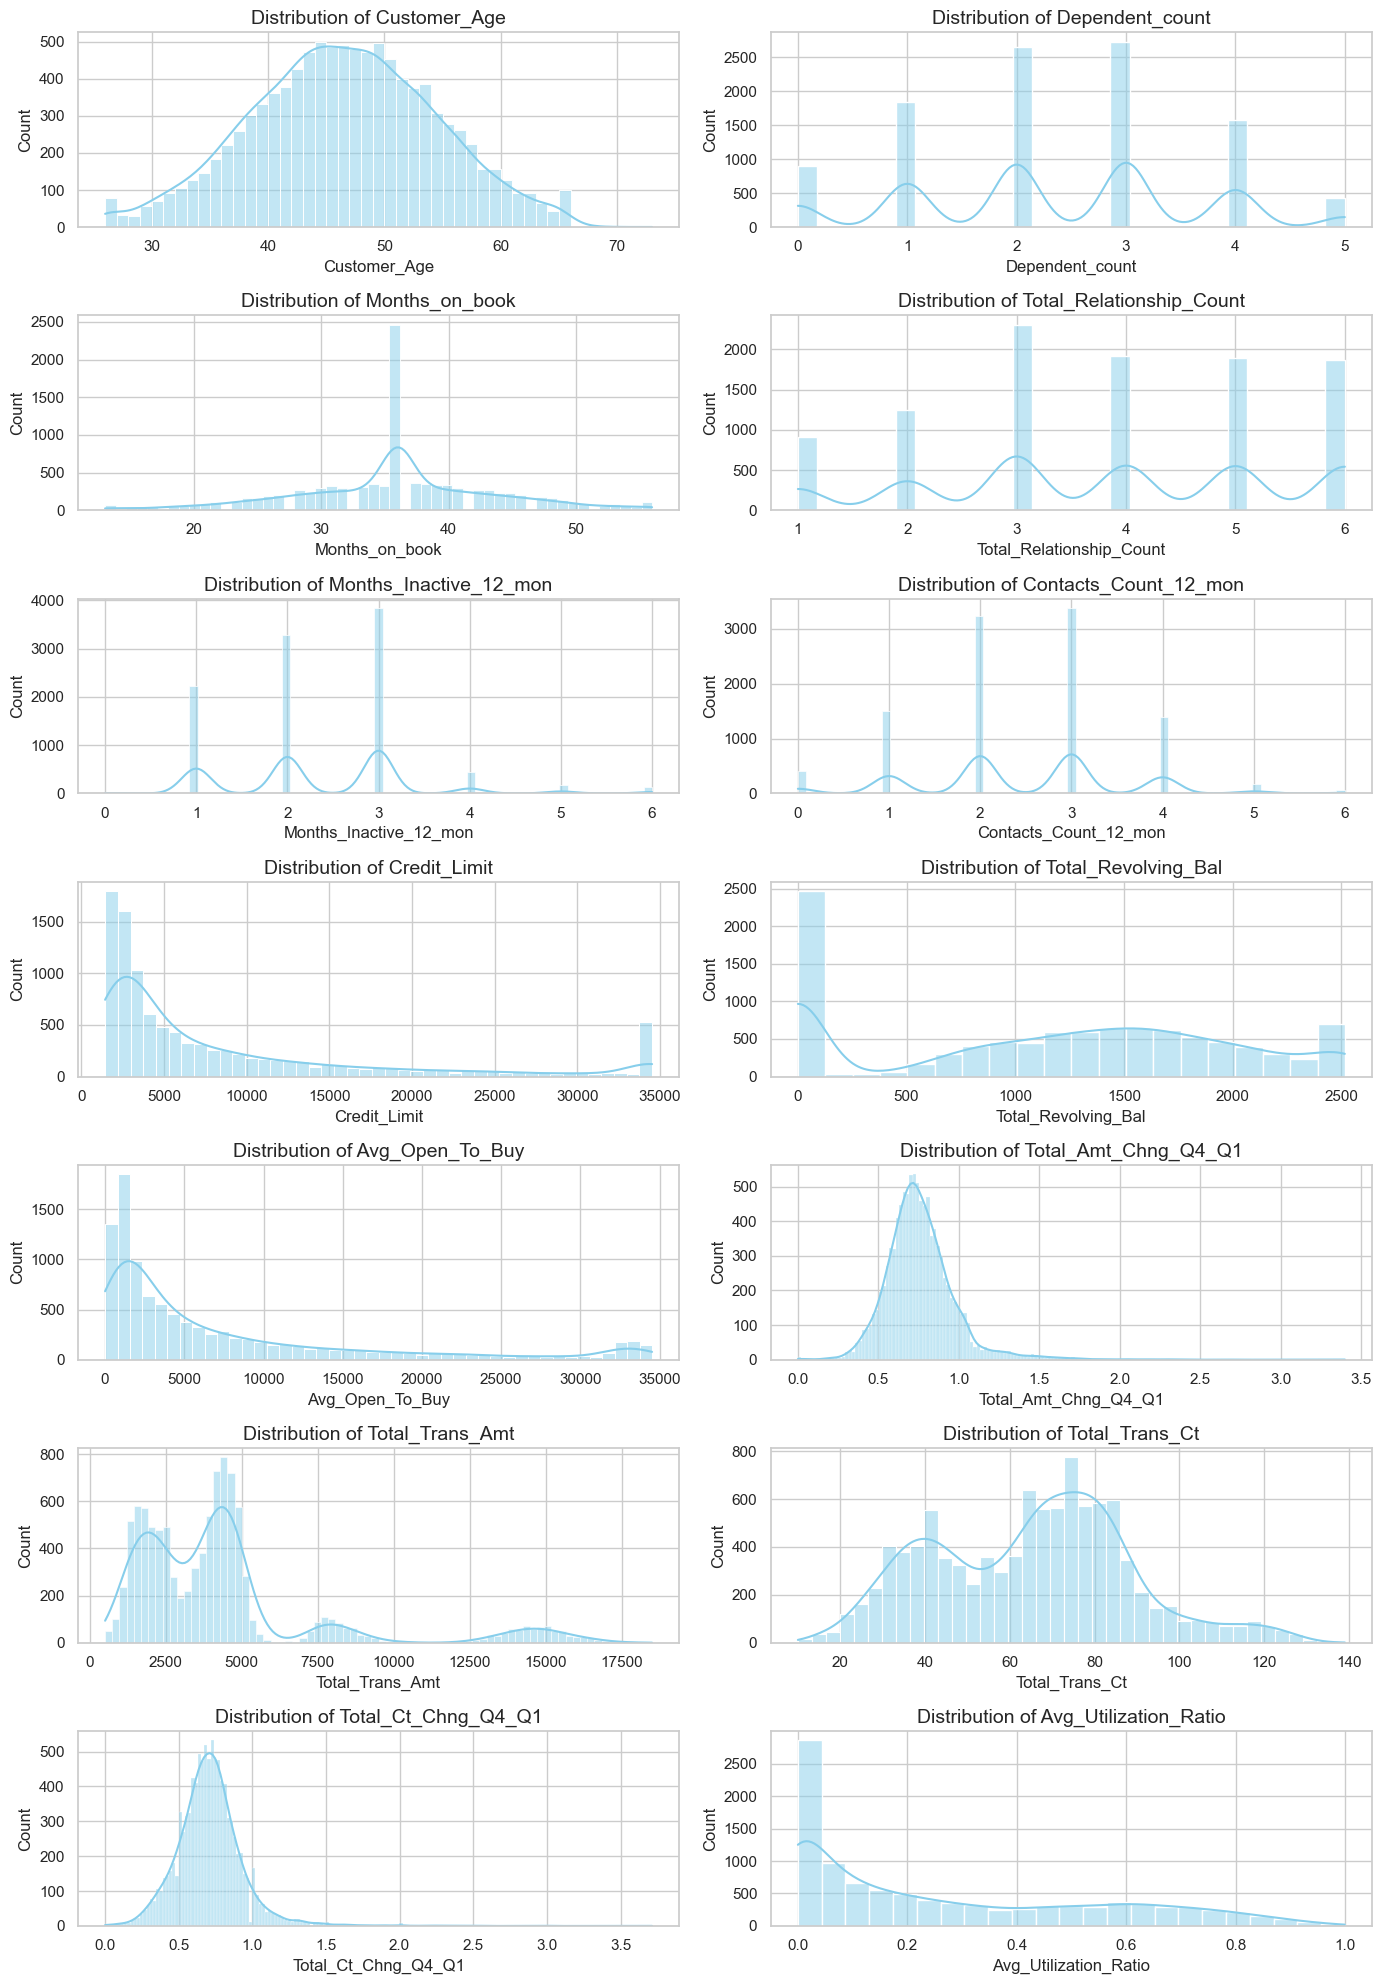

In [115]:

fig, axes = plt.subplots(7, 2, figsize=(14, 20)) 

# Plot distribution plots for each skewed column
for i, column in enumerate(numerical_columns):
    row = i // 2  # Calculate the row for the subplot
    col = i % 2   # Calculate the column for the subplot
    sns.histplot(data=df, x=column, ax=axes[row, col], kde=True, color='skyblue')
    
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14)


plt.tight_layout()
plt.show()


## Bivariate Analysis

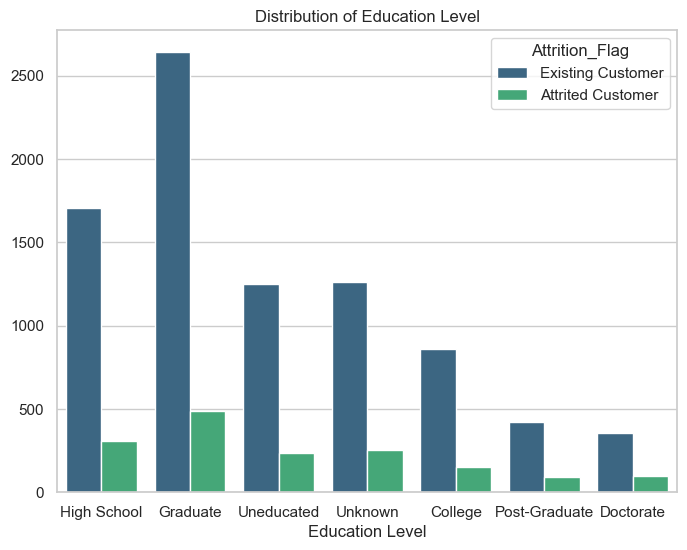

In [116]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Education_Level',palette='viridis',hue='Attrition_Flag')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('')
plt.show()

In [117]:
# Splitting columns into Categorical and Numerical Features
categorical_columns = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\2029561721.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df,x= column, ax = axes[row, col], color='skyblue', hue='Attrition_Flag')
C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\2029561721.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df,x= column, ax = axes[row, col], color='skyblue', hue='Attrition_Flag')
C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\2029561721.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df,x= column, ax = axes[row, col], color='skyblue', hue='Attrition_Flag')
C:\Users\hamid\AppData\Local\Temp\ipykernel_9436\202

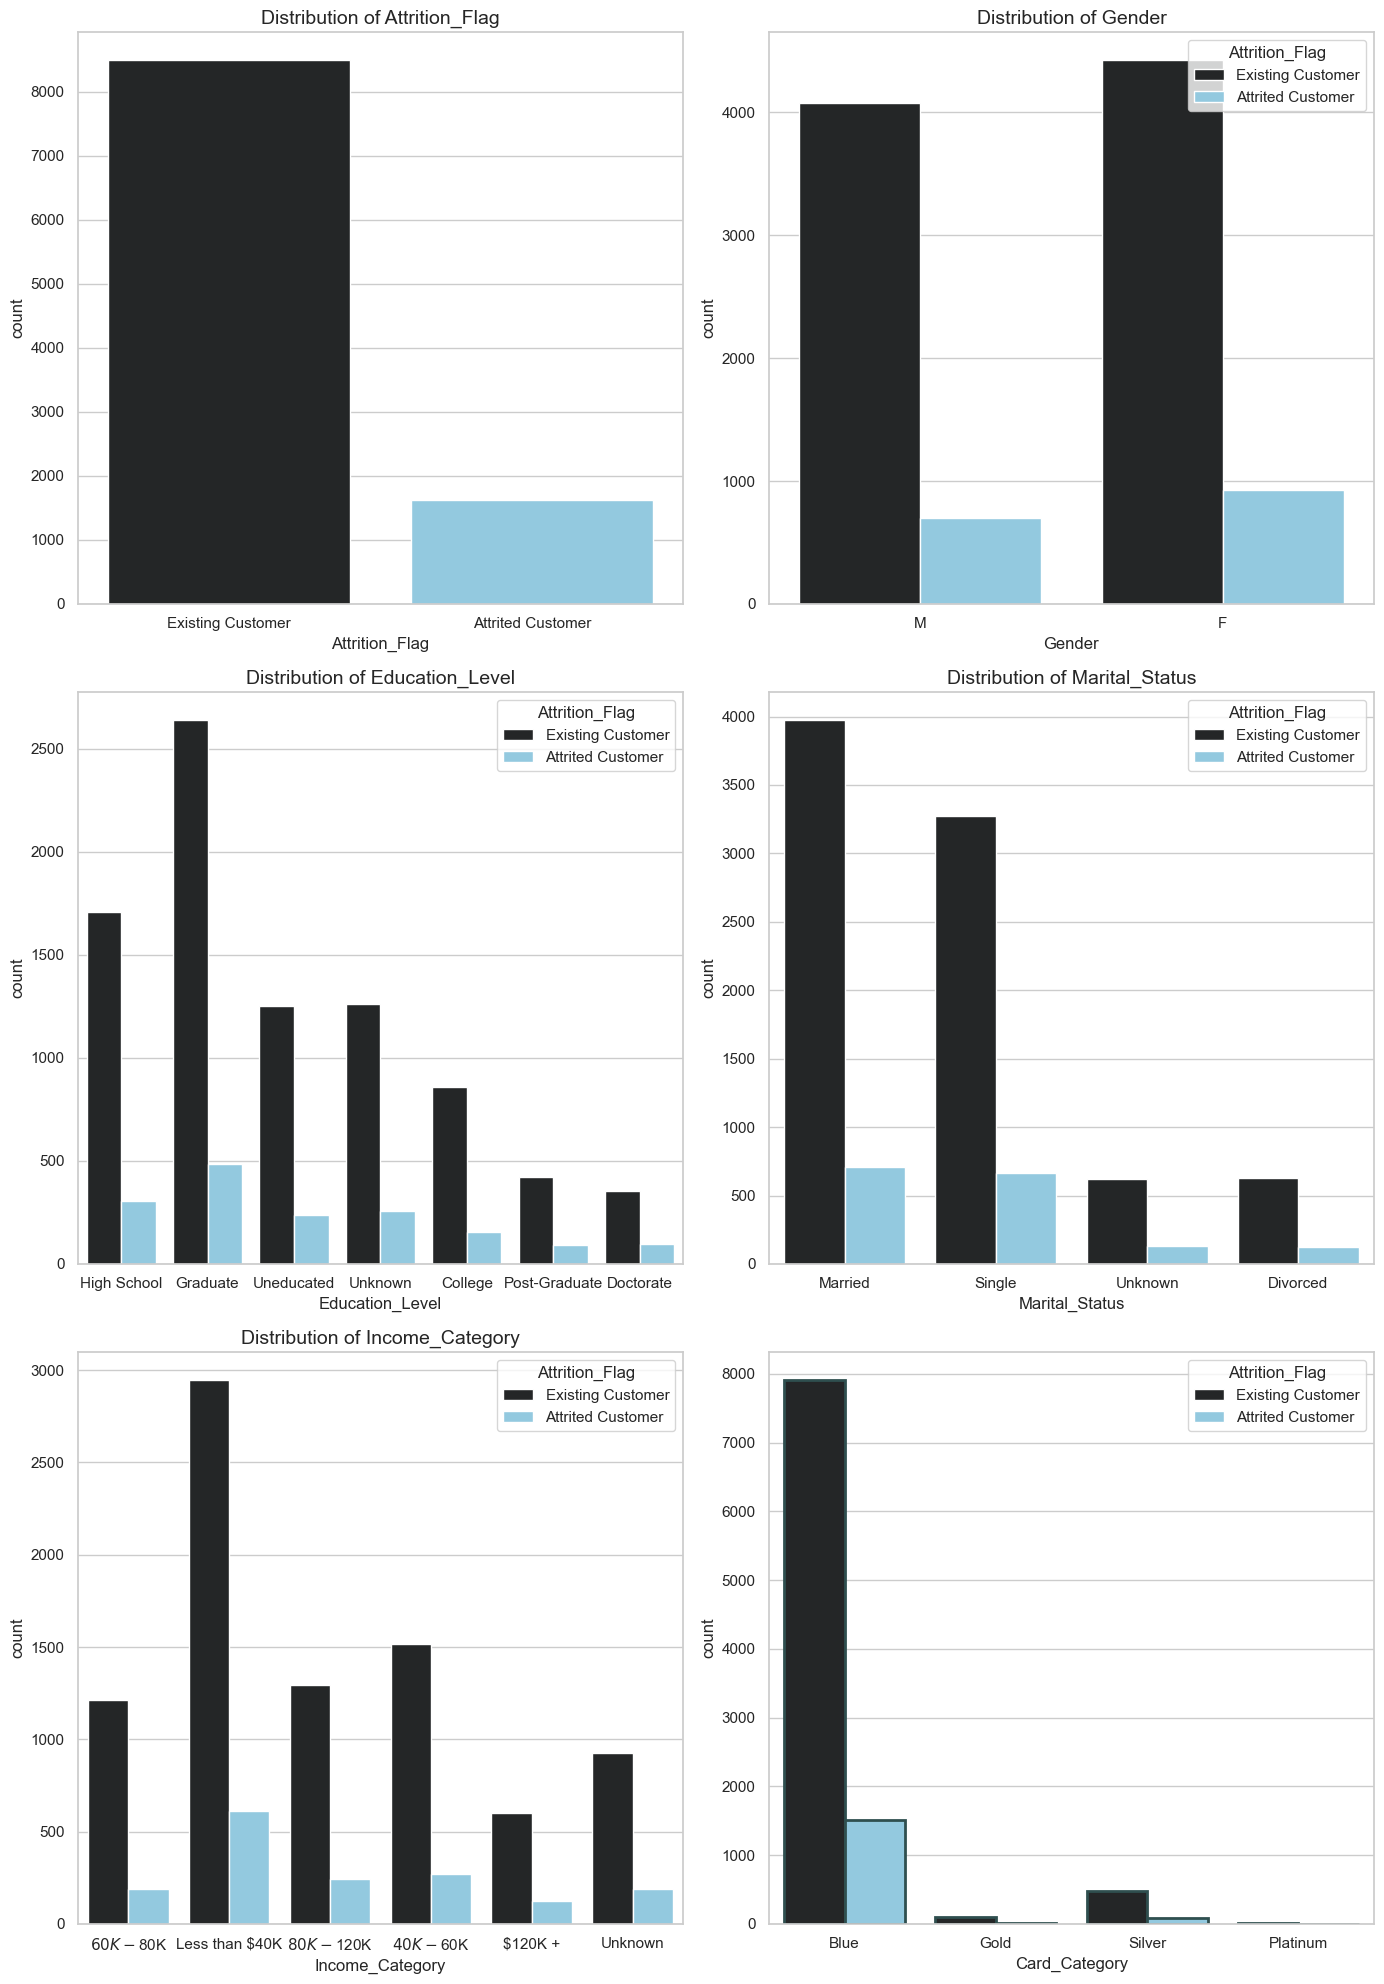

In [118]:
fig, axes = plt.subplots(3, 2, figsize=(14, 20)) 

# Plot distribution plots for each skewed column
for i, column in enumerate(categorical_columns):
    row = i // 2  # Calculate the row for the subplot
    col = i % 2   # Calculate the column for the subplot
    if column == 'Card_Category':
        ax = sns.countplot(x='Card_Category', data=df, color='skyblue', hue='Attrition_Flag')

        # Personnalisez les barres avec une bordure plus épaisse et une couleur différente
        for bar in ax.patches:
            bar.set_edgecolor('DarkSlateGrey')
            bar.set_linewidth(2)
    else:  
        sns.countplot(data=df,x= column, ax = axes[row, col], color='skyblue', hue='Attrition_Flag')
        axes[row, col].set_title(f'Distribution of {column}', fontsize=14)



plt.tight_layout()
plt.show()

## Predictive Model and Evaluation:

The model is gonna be used to predict whether a customer is likely to terminate their contract with your service or stay. This is a powerful tool for businesses because it can help identify at-risk customers and implement proactive strategies to retain them.


In the context of customer attrition, where the target variable is binary (attrition or not), logistic regression is generally more appropriate, because it allows modeling the probability that the target variable is equal to a given class.

## Logistic Regression


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Data Preprocessing ⚒️

In [120]:
df = df.drop(['CLIENTNUM'], axis=1)

In [121]:
# Working with Ordinal Features with pandas `map` method.

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {  
    'Unknown': 0, 
    'Uneducated': 1, 
    'High School': 2, 
    'College': 3,
    'Post-Graduate': 4, 
    'Graduate': 5, 
    'Doctorate': 6
} 

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)

df['Education_Level'] = df['Education_Level'].map(edu_level_dic)

df['Income_Category'] = df['Income_Category'].map(income_cat_dic)

df['Card_Category'] = df['Card_Category'].map(card_cat_dic)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,5,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,5,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [127]:
# Working with Nominal Features with pandas `get_dummies` function.
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])

In [128]:
feature_df = df.drop('Attrition_Flag', axis=1)
target_df = df['Attrition_Flag']

###  Split the dataset into the training and testing part

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Split the dataset into the training and testing part

In [133]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluate the trained model with various metrics

In [134]:
# make predictions for the entire testing dataset
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

#### Confusion matrix

In [135]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2486   97]
 [ 221  235]]


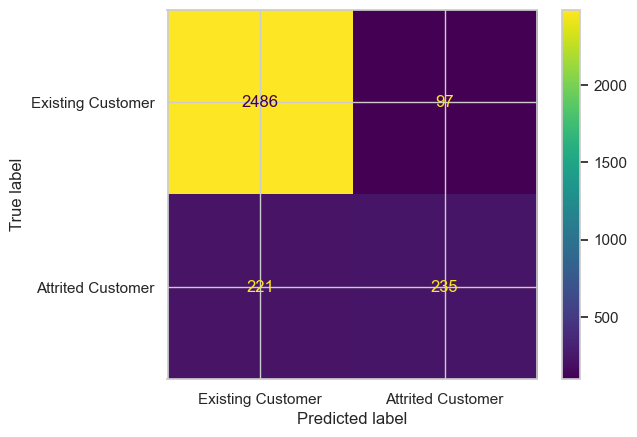

In [137]:
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Existing Customer', 'Attrited Customer']
)
disp.plot()
plt.show()

#### Accuracy, precision, recall & F1-score

In [138]:
# calcualte the metrics by sklearn
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

Accuracy:	 0.8953603158933859
Precision:	 0.7078313253012049
Recall:		 0.5153508771929824
F1-score:	 0.5964467005076143


In [139]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2583
           1       0.71      0.52      0.60       456

    accuracy                           0.90      3039
   macro avg       0.81      0.74      0.77      3039
weighted avg       0.89      0.90      0.89      3039



#### ROC curve & AUC

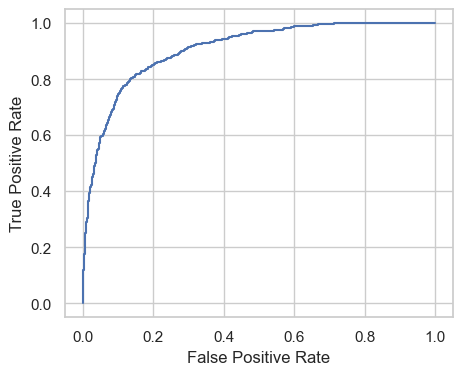

In [140]:
# compute ROC curve
fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [5, 4])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [141]:
# calculate AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

AUC:	 0.9077342747111683
